In [1]:
import csv
import pandas as pd

df = pd.read_csv (r'RealestateData.csv')
print (df)

      Unnamed: 0               PropertyType                  Address  \
0        house_0  Single Family Residential       123 E Rosemary Ln    
1        house_1  Single Family Residential            165 Hunt Way    
2        house_2  Single Family Residential            165 Hunt Way    
3        house_3  Single Family Residential            673 Regas Dr    
4        house_4                Condo/Co-op  850 Apricot Ave Unit A    
...          ...                        ...                      ...   
1523  house_1523  Single Family Residential         2495 Crystal Dr    
1524  house_1524  Single Family Residential         184 Bel Ayre Dr    
1525  house_1525  Single Family Residential         2321 Rosita Ave    
1526  house_1526  Single Family Residential              80 Cook Pl    
1527  house_1527  Single Family Residential        2445 Alvarado Dr    

             City State ZipCode    Price Beds Baths Living_Sq_Ft  ...  \
0        CAMPBELL    CA   95008  1250000    3     2        1,2

# Basic cleaning Process

In [2]:
dataFromCsv=df[df['Hoa/Month']!=0][['Hoa/Month','Price','PropertyType','ZipCode','City','Beds','Living_Sq_Ft','Address']]

## Convert City to uppercase
def ConvertToUpper(CityName):
    return CityName.upper()
dataFromCsv['City']=dataFromCsv['City'].apply(ConvertToUpper)

## Filter down cities
filteredCities = ['FREMONT','HAYWORD','MOUNTAIN VIEW', 
                  'UNION CITY', 'SUNNYVALE', 'SANTA CLARA', 
                  'SAN JOSE', 'CUPERTINO', 'PALO ALTO', 
                  'SAN FRANCISCO']
filteredData = dataFromCsv[dataFromCsv.City.isin(filteredCities)]

## 5 entries in Palo Alto and 1 in Cupertino has HOA listed per year instead of per month. Adjust their HOA data
def AdjustHoa(HoaValue):
    HoaValue=int(HoaValue)
    if HoaValue > 4000:
        return HoaValue/12
    else:
        return HoaValue

filteredData['Hoa/Month']=filteredData['Hoa/Month'].apply(AdjustHoa)


C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# HOA Variation by Region or Property Type

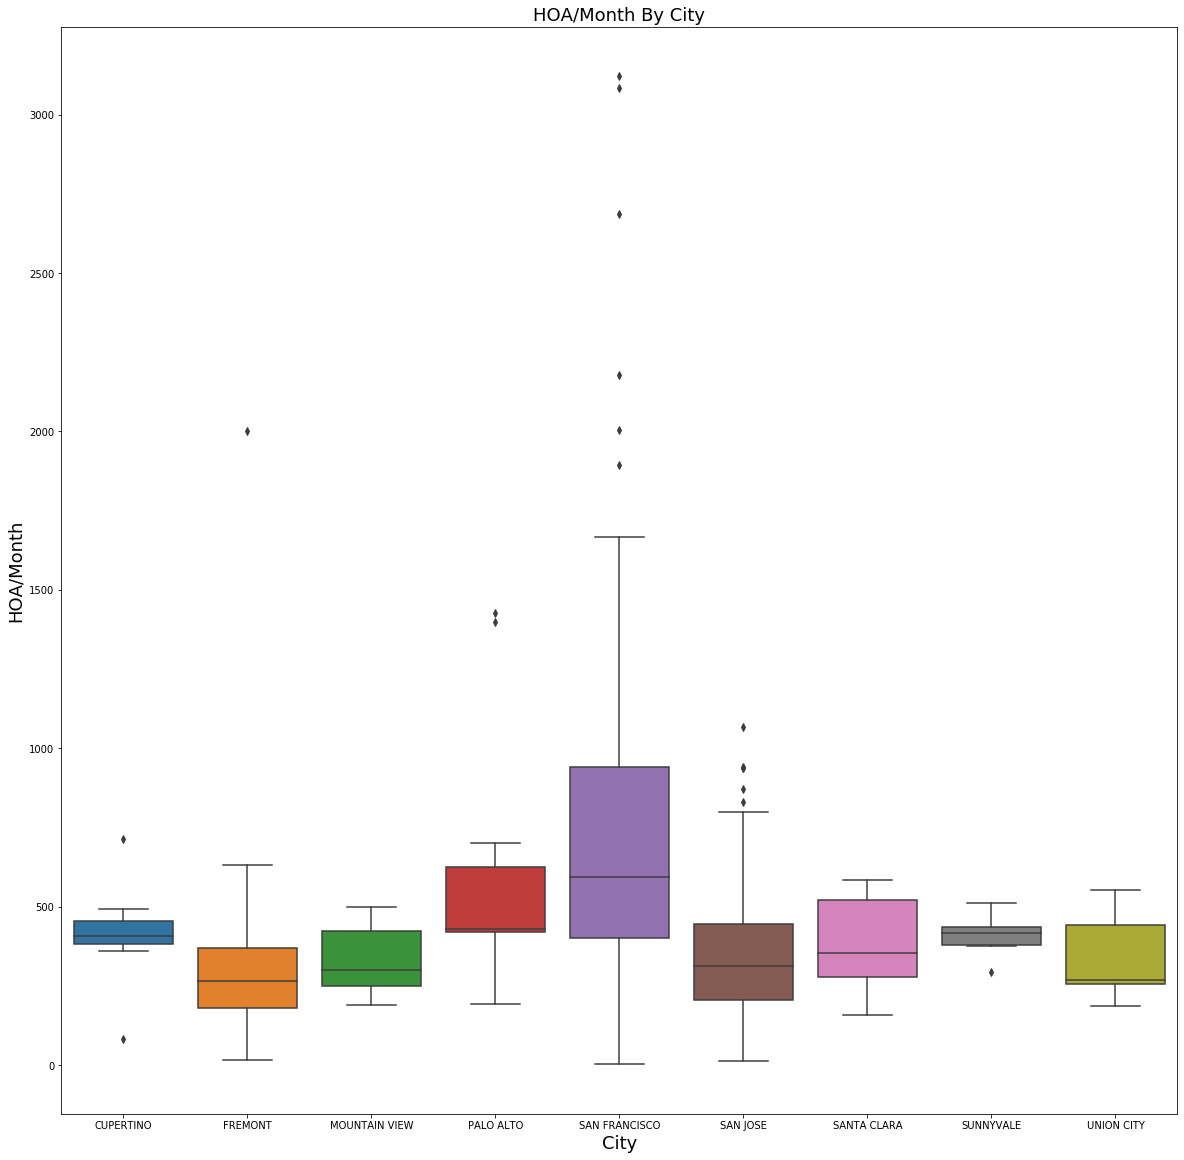

In [23]:
plt.figure(figsize=(20,20))
w=sns.boxplot(data=filteredData, x='City', y='Hoa/Month')
w.set_xlabel("City", fontsize=18)
w.set_ylabel("HOA/Month", fontsize=18)
w.set_title("HOA/Month By City", fontsize=18)
plt.show()

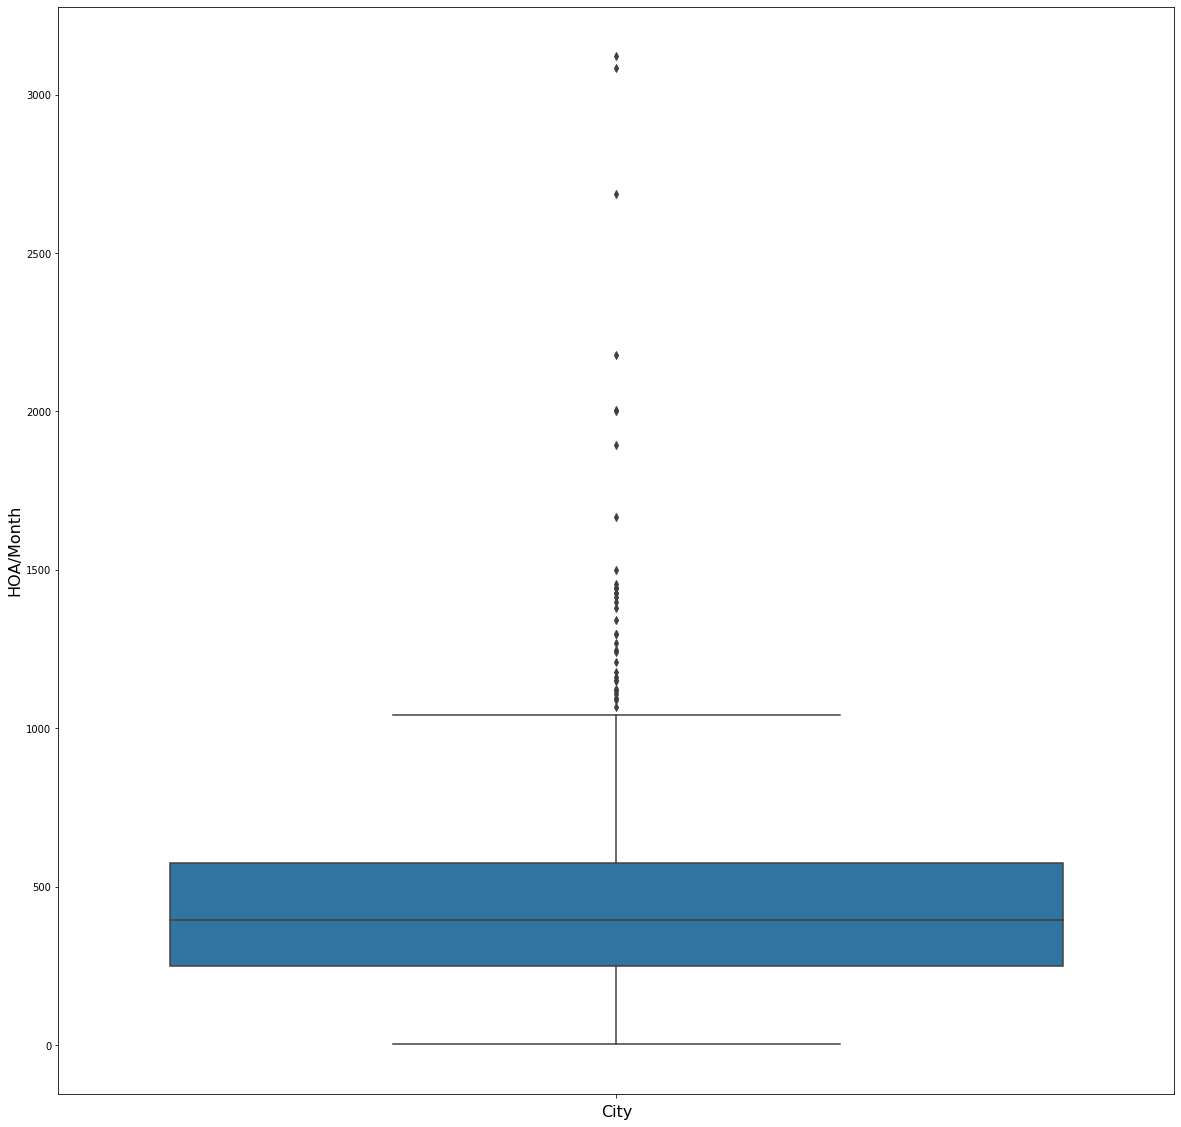

In [5]:
plt.figure(figsize=(20,20))
w=sns.boxplot(data=filteredData, y='Hoa/Month')
w.set_xlabel("City", fontsize=16)
w.set_ylabel("HOA/Month", fontsize=16)
plt.show()

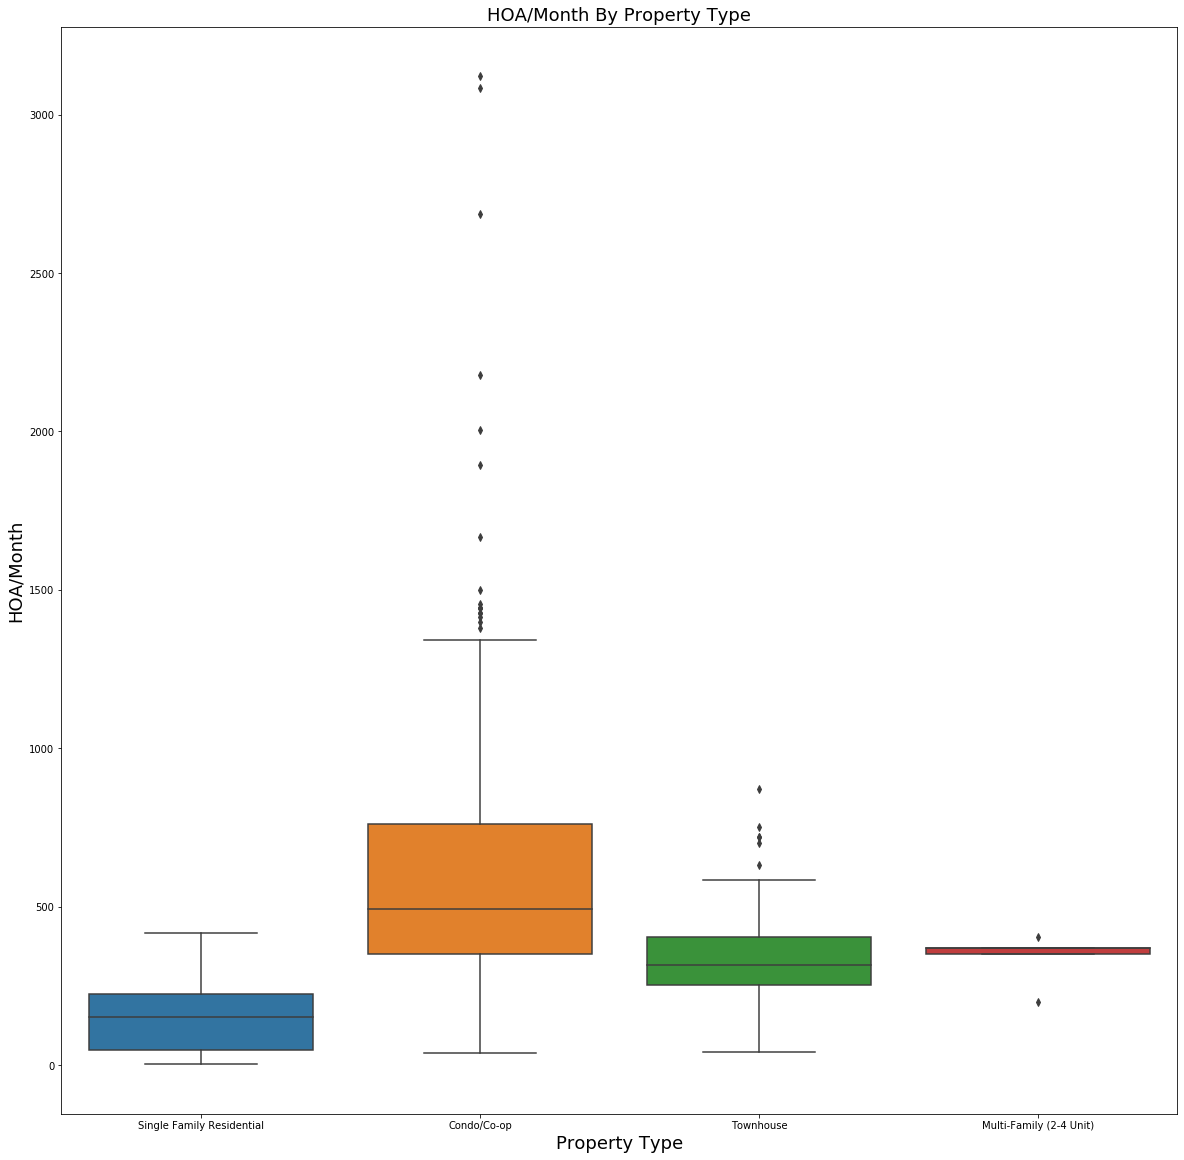

In [24]:
data=filteredData[filteredData.PropertyType.isin(['Single Family Residential','Condo/Co-op','Townhouse','Multi-Family (2-4 Unit)'])]
plt.figure(figsize=(20,20))
w=sns.boxplot(data=data, x='PropertyType', y='Hoa/Month')
w.set_xlabel("Property Type", fontsize=18)
w.set_ylabel("HOA/Month", fontsize=18)
w.set_title("HOA/Month By Property Type",fontsize=18)
plt.show()

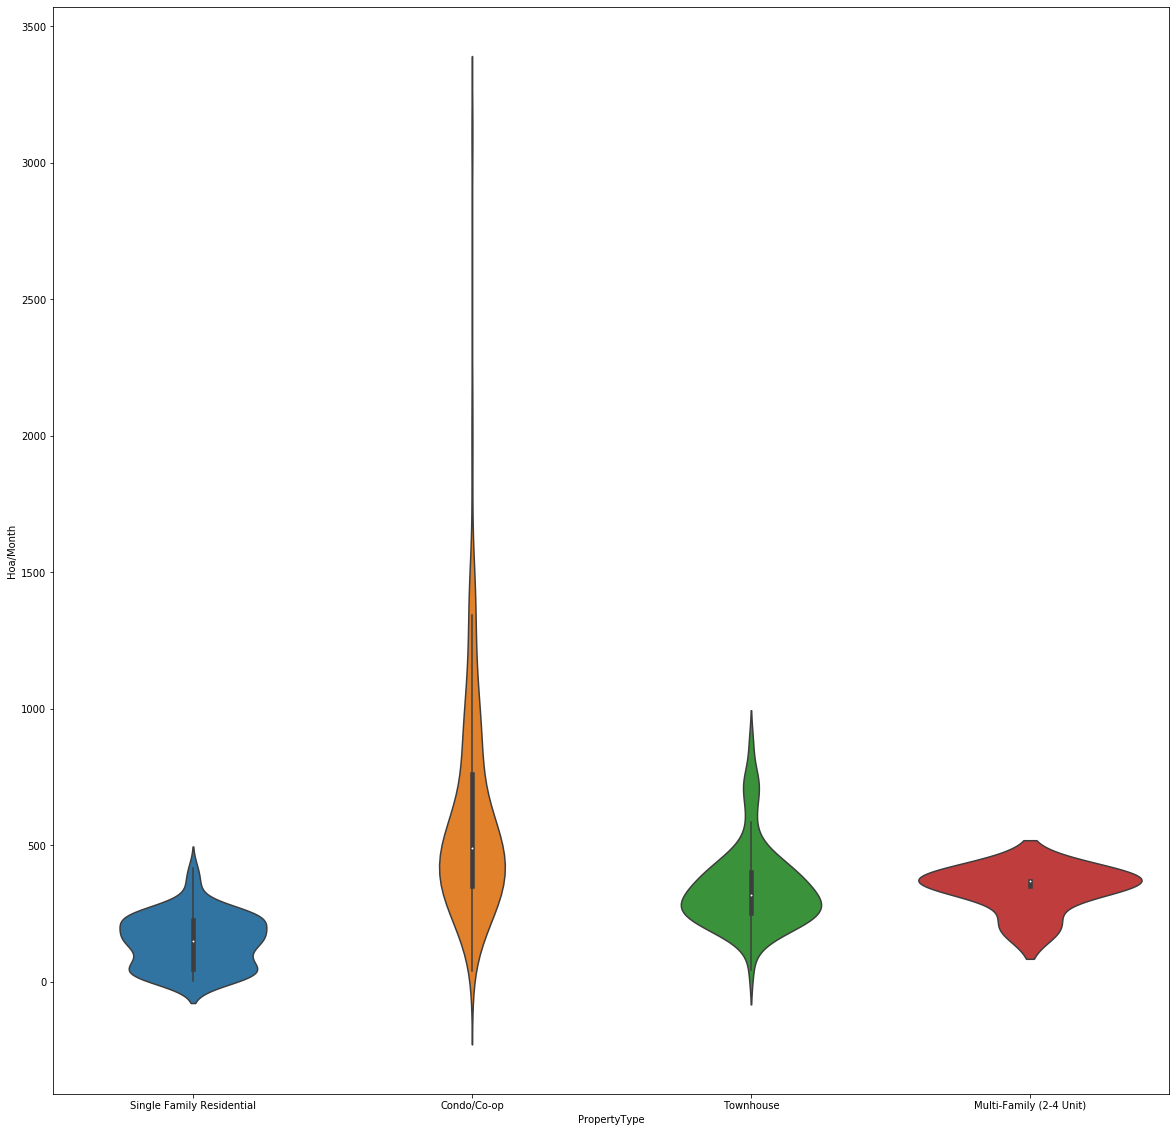

In [7]:
data=filteredData[filteredData.PropertyType.isin(['Single Family Residential','Condo/Co-op','Townhouse','Multi-Family (2-4 Unit)'])]
plt.figure(figsize=(20,20))
w=sns.violinplot(data=data, x='PropertyType', y='Hoa/Month')
plt.show()

# Distribution by Bed and Property type

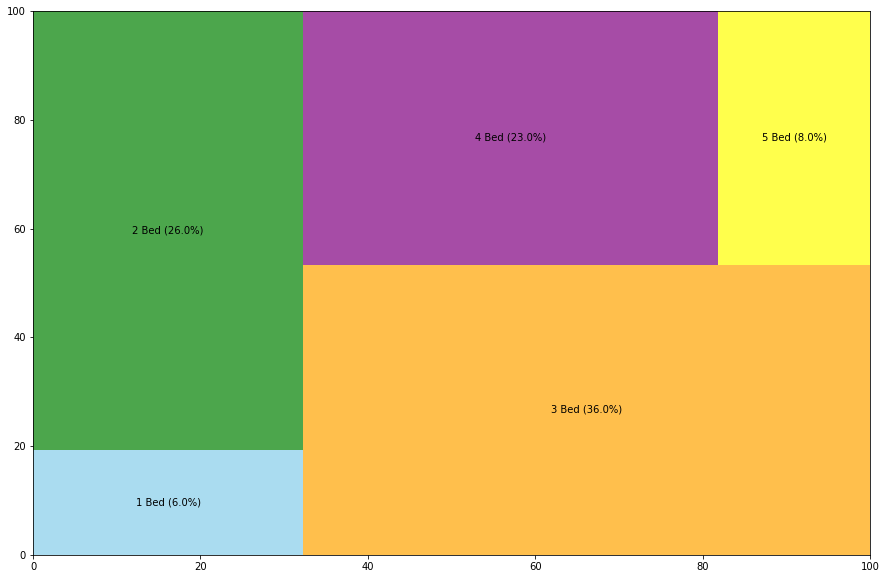

In [8]:
import squarify

filteredData=df

def appendPctToLabels(labels,valueArr, suffix):
    total = sum(valueArr)
    valueArr = valueArr*100/total
    for i in range(len(valueArr)):
        labels[i] += suffix + " (" + str(round(valueArr[i])) + "%)"
    return labels

data = filteredData[filteredData.Beds.isin(['1','2','3','4','5'])]
Bed_Count=data.groupby('Beds').count()['Hoa/Month'].values
labels=data.groupby('Beds').count().index.values
labels=appendPctToLabels(labels,Bed_Count,' Bed')
                  
plt.figure(figsize=(15,10))
squarify.plot(sizes=Bed_Count, label=labels, color=['skyblue','green','orange','purple','yellow'], alpha=.7 )
plt.show()

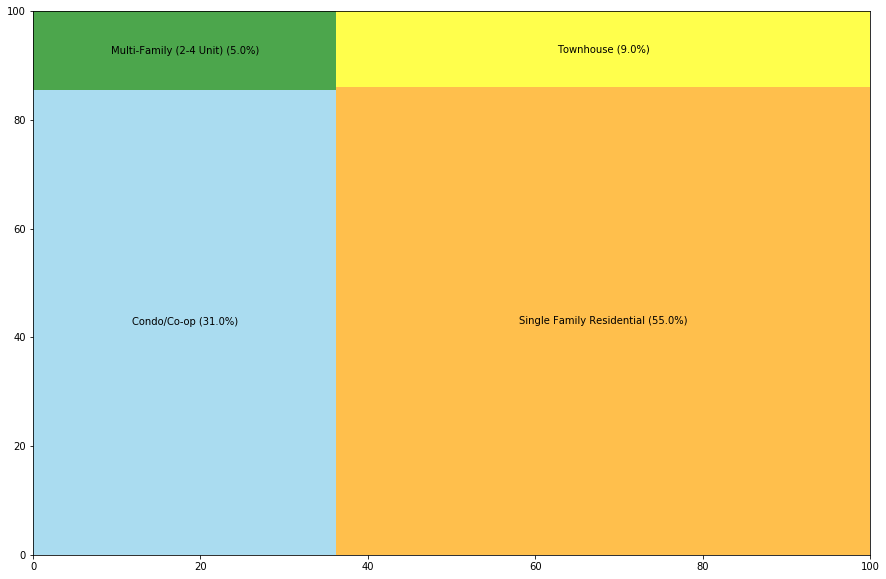

In [9]:
data = filteredData[filteredData.PropertyType.isin(['Single Family Residential','Condo/Co-op','Townhouse','Multi-Family (2-4 Unit)'])]

PropertyType_Count=data.groupby('PropertyType').count()['Hoa/Month'].values
labels=data.groupby('PropertyType').count().index.values
labels = appendPctToLabels(labels, PropertyType_Count, '')
                  
plt.figure(figsize=(15,10))
squarify.plot(sizes=PropertyType_Count, label=labels, color=['skyblue','green','orange','yellow'], alpha=.7 )
plt.show()

# Age of Ownership (Property Type and Bed)

In [10]:
saleHistory_df = pd.read_csv (r'realestate_sale_history_all_df.csv')
print (saleHistory_df)

        Unnamed: 0               PropertyType                  Address  \
0        house_0.0  Single Family Residential       123 E Rosemary Ln    
1        house_0.1  Single Family Residential       123 E Rosemary Ln    
2        house_2.0  Single Family Residential            673 Regas Dr    
3        house_3.0                Condo/Co-op  850 Apricot Ave Unit A    
4        house_3.1                Condo/Co-op  850 Apricot Ave Unit A    
...            ...                        ...                      ...   
1494  house_1323.1  Single Family Residential         184 Bel Ayre Dr    
1495  house_1324.0  Single Family Residential         2321 Rosita Ave    
1496  house_1324.1  Single Family Residential         2321 Rosita Ave    
1497  house_1326.0  Single Family Residential        2445 Alvarado Dr    
1498  house_1326.1  Single Family Residential        2445 Alvarado Dr    

             City State ZipCode       Price Beds Baths  YearBuilt  \
0        CAMPBELL    CA   95008  $1,250,00

In [11]:
# filter rows with negative years owned
filtered_df=saleHistory_df[saleHistory_df['YearsOwned']>=0]

# Sales data beyond the 1960s is untrust worthy. Filter them out.
filtered_df=filtered_df[(filtered_df['YearsOwned']!=(filtered_df['SaleYear']-filtered_df['YearBuilt'])) | (filtered_df['YearsOwned']<40)]
filtered_df.sort_values(by=['YearBuilt'])

,Unnamed: 0,PropertyType,Address,City,State,ZipCode,Price,Beds,Baths,YearBuilt,YearRenovated,SaleYear,SalePrice,YearsOwned
738,house_751.0,Single Family Residential,3841 18th St,San Francisco,CA,94114,"$3,450,000",5,3,1886,—,2007,2090000,9
647,house_658.0,Condo/Co-op,1945 Ofarrell St,San Francisco,CA,94115,"$1,299,000",3,1,1890,—,2007,685000,3
1221,house_1087.0,Multi-Family (5+ Unit),530 N 2nd St,SAN JOSE,CA,95112,"$2,695,000",3,—,1898,1898,2004,588500,15
1222,house_1087.1,Multi-Family (5+ Unit),530 N 2nd St,SAN JOSE,CA,95112,"$2,695,000",3,—,1898,1898,1989,250000,4
731,house_747.0,Condo/Co-op,3718 Cesar Chavez,San Francisco,CA,94110,"$749,000",1,1,1900,—,2015,580000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,house_5.0,Single Family Residential,10111 N Foothill Blvd,CUPERTINO,CA,95014,"$2,575,000",3,3,2017,2017,2018,2399000,1
276,house_293.0,Single Family Residential,1976 Wingate Way,Hayward,CA,94541,"$985,000",4,3,2017,2017,2016,269500,10
608,house_611.0,Condo/Co-op,1490 Ocean Ave #304,San Francisco,CA,94112,"$1,295,000",2,2,2017,—,2018,1250000,1
613,house_616.0,Condo/Co-op,1545 Pine St #802,San Francisco,CA,94109,"$998,000",1,1,2017,—,2018,1005000,0


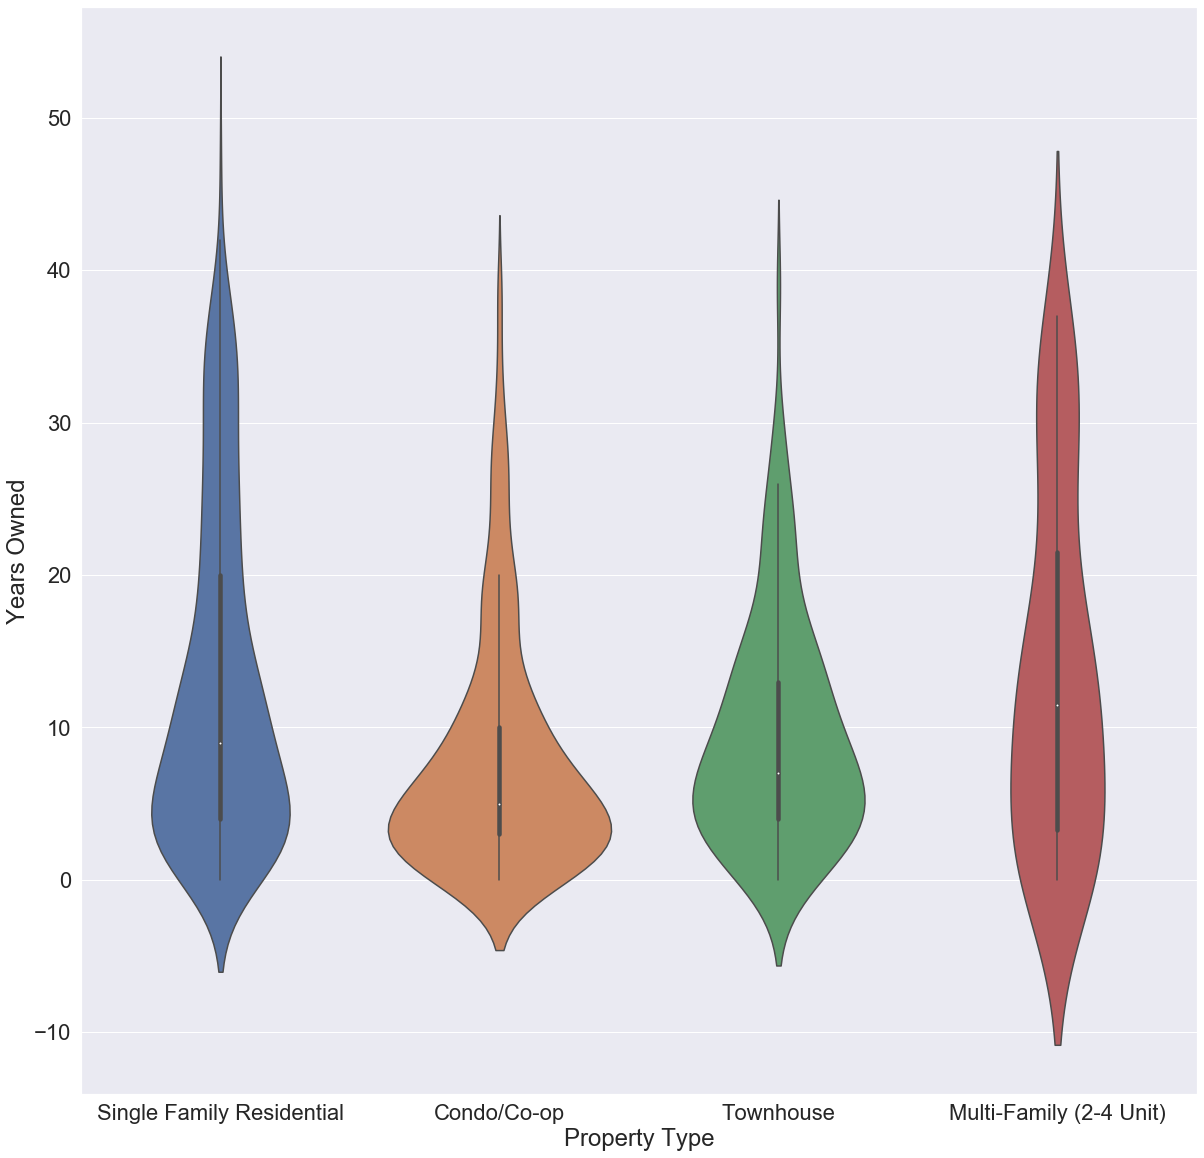

In [24]:
data=filtered_df[filtered_df.PropertyType.isin(['Single Family Residential','Condo/Co-op','Townhouse','Multi-Family (2-4 Unit)'])]
plt.figure(figsize=(20,20))
w=sns.violinplot(data=data, x='PropertyType', y='YearsOwned')
w.set_xlabel('Property Type')
w.set_ylabel('Years Owned')
# w=sns.violinplot(data=data, x='PropertyType', y='YearsOwned')
plt.show()

In [82]:
def ConvertBedToCount(BedString):
    try:
        return int(BedString)
    except:
        return 0
filtered_df['Beds']=filtered_df['Beds'].apply(ConvertBedToCount)
filtered_df.groupby('Beds').count()

,Unnamed: 0,PropertyType,Address,City,State,ZipCode,Price,Baths,YearBuilt,YearRenovated,SaleYear,SalePrice,YearsOwned
Beds,,,,,,,,,,,,,
0,14,14,14,14,14,14,14,14,14,14,14,14,14
1,105,105,105,105,105,105,105,105,105,105,105,105,105
2,330,330,330,330,330,330,330,330,330,330,330,330,330
3,410,410,410,410,410,410,410,410,410,410,410,410,410
4,245,245,245,245,245,245,245,245,245,245,245,245,245
5,93,93,93,93,93,93,93,93,93,93,93,93,93
6,30,30,30,30,30,30,30,30,30,30,30,30,30
7,2,2,2,2,2,2,2,2,2,2,2,2,2
8,10,10,10,10,10,10,10,10,10,10,10,10,10


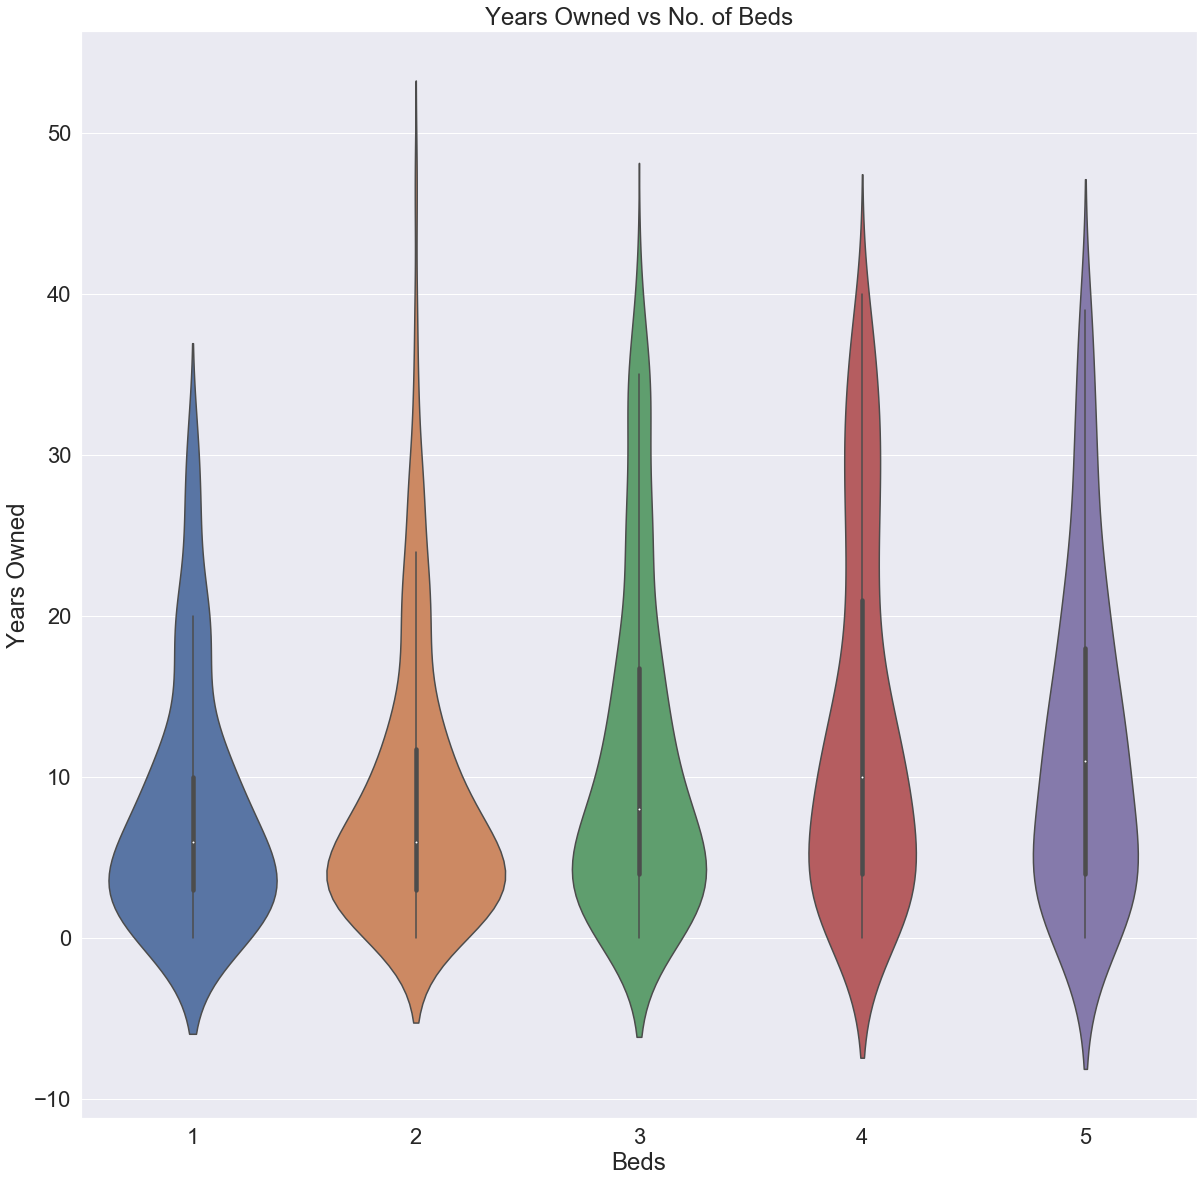

In [42]:
data=filtered_df[filtered_df['Beds']!=0]
data=data[data.Beds.isin(['1','2','3','4','5'])]

# data.sort_values(by=['Beds'])
plt.figure(figsize=(20,20))
w=sns.violinplot(data=data, x='Beds', y='YearsOwned')
w.set_xlabel('Beds')
w.set_ylabel('Years Owned')
# w=sns.violinplot(data=data, x='Beds', y='YearsOwned')
w.set_title('Years Owned vs No. of Beds')
plt.show()

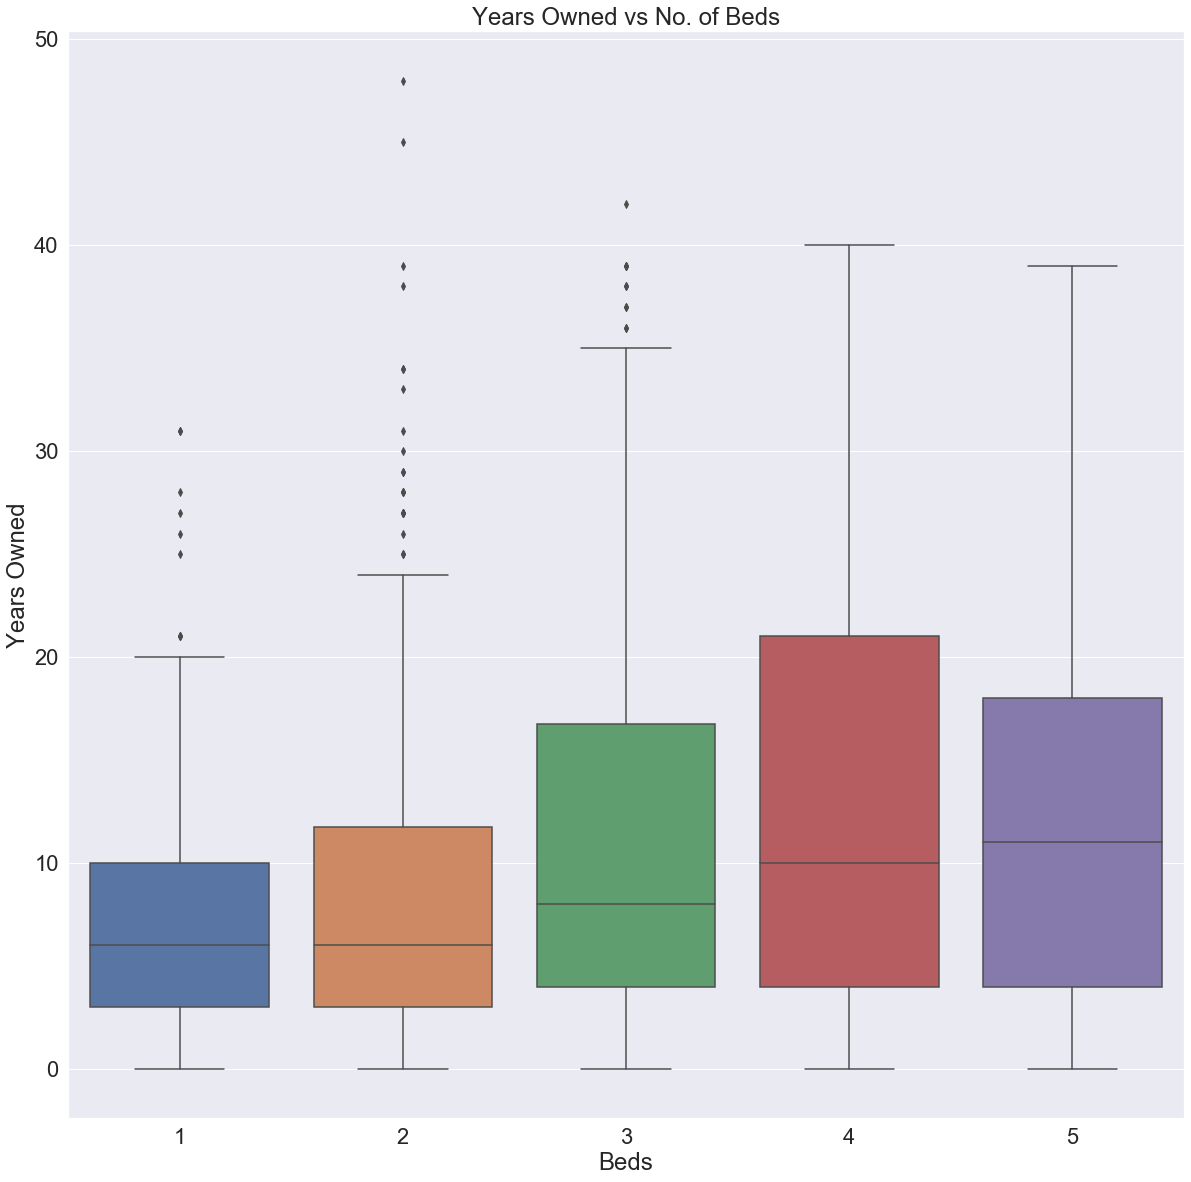

In [44]:
data=filtered_df[filtered_df['Beds']!=0]
data=data[data.Beds.isin(['1','2','3','4','5'])]
data.sort_values(by=['Beds'])

plt.figure(figsize=(20,20))
w=sns.boxplot(data=data, x='Beds', y='YearsOwned')
w.set_xlabel('Beds')
w.set_ylabel('Years Owned')
# w=sns.violinplot(data=data, x='Beds', y='YearsOwned')
w.set_title('Years Owned vs No. of Beds')
plt.show()

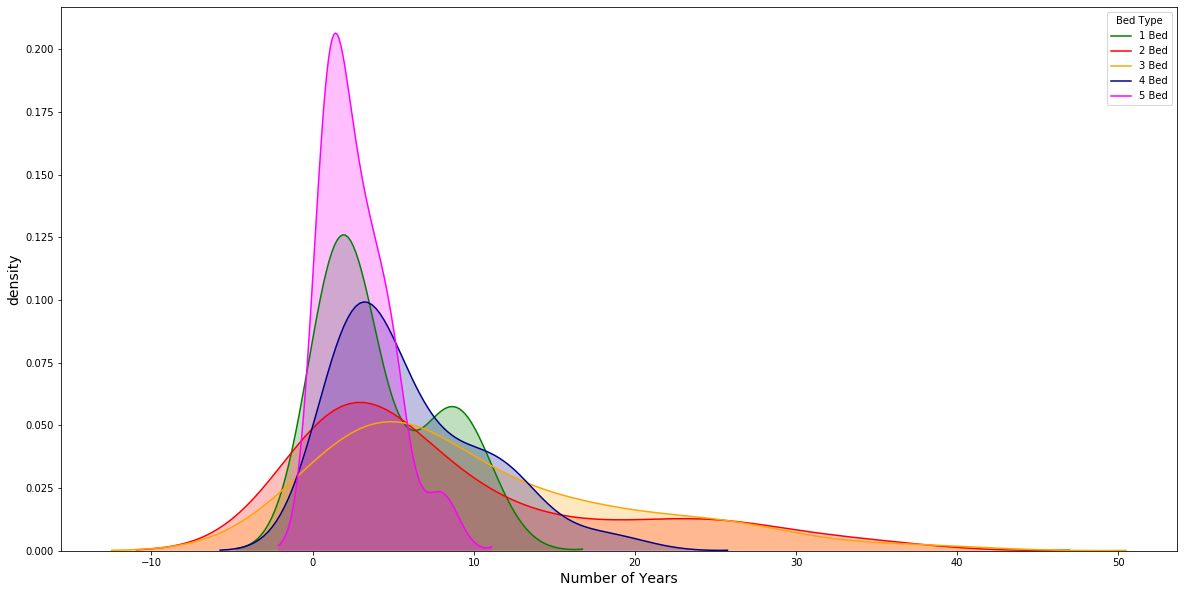

In [84]:

import itertools
overallSeries = filtered_df.groupby('YearsOwned').count()['PropertyType'].values
Bed1Series = filtered_df[filtered_df['Beds']==1].groupby('YearsOwned').count()['PropertyType'].values
Bed2Series = filtered_df[filtered_df['Beds']==2].groupby('YearsOwned').count()['PropertyType'].values
Bed3Series = filtered_df[filtered_df['Beds']==3].groupby('YearsOwned').count()['PropertyType'].values
Bed4Series = filtered_df[filtered_df['Beds']==4].groupby('YearsOwned').count()['PropertyType'].values
Bed5Series = filtered_df[filtered_df['Beds']==5].groupby('YearsOwned').count()['PropertyType'].values
#Bed5Series = []

nest=[overallSeries,Bed1Series,Bed2Series,Bed3Series,Bed4Series,Bed5Series]
nest_labels=['Overall','1 Bed','2 Bed','3 Bed','4 Bed','5 Bed']

kde_df = pd.DataFrame((_ for _ in itertools.zip_longest(*nest)),columns=nest_labels)

plt.figure(figsize=(20,10))
# ax = kde_df.plot.kde(bw_method=0.5)
# ax.set_xlim(0,20)
# ax.legend(loc='best')
# plt.show()

sns.kdeplot(Bed1Series, color="green", shade=True, label='1 Bed')
sns.kdeplot(Bed2Series, color="red", shade=True, label='2 Bed')
sns.kdeplot(Bed3Series, color="orange", shade=True, label='3 Bed')
sns.kdeplot(Bed4Series, color="darkblue", shade=True, label='4 Bed')
sns.kdeplot(Bed5Series, color="magenta", shade=True, label='5 Bed')
plt.legend(title='Bed Type',loc='best')
plt.xlabel("Number of Years", fontsize=14)
plt.ylabel("density", fontsize=14)
#plt.savefig('densitygraph.png',dpi=400)
plt.show()

# Renting vs Buying

In [16]:
import csv
import pandas as pd

rentData_df = pd.read_csv('RentData.csv')

# filtered_df
filteredData

,Unnamed: 0,PropertyType,Address,City,State,ZipCode,Price,Beds,Baths,Living_Sq_Ft,...,M.schoolRating,HighSchool,H.SchoolRating,Heating,Cooling,WalkableScore,TransitScore,BikeableScore,RedfinEstimate,Status
0,house_0,Single Family Residential,123 E Rosemary Ln,CAMPBELL,CA,95008,1250000,3,2,"1,252",...,NaN,NaN,NaN,Gas,Window/Wall Unit,85.0,43.0,82.0,"$1,276,922",Active
1,house_1,Single Family Residential,165 Hunt Way,CAMPBELL,CA,95008,1275000,3,2,"1,331",...,NaN,NaN,NaN,Central Forced Air,Central Forced Air,31.0,33.0,53.0,"$1,269,365",Active
2,house_2,Single Family Residential,165 Hunt Way,CAMPBELL,CA,95008,1275000,3,2,"1,331",...,NaN,NaN,NaN,Central Forced Air,Central Forced Air,31.0,33.0,53.0,"$1,269,365",Active
3,house_3,Single Family Residential,673 Regas Dr,CAMPBELL,CA,95008,1989888,4,3,"3,500",...,8.0,NaN,NaN,Forced Air,Central Forced Air,74.0,44.0,85.0,"$2,095,588",Active
4,house_4,Condo/Co-op,850 Apricot Ave Unit A,CAMPBELL,CA,95008,799000,2,2,"1,065",...,8.0,NaN,NaN,Baseboard,Window/Wall Unit,68.0,45.0,82.0,"$800,898",Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,house_1523,Single Family Residential,2495 Crystal Dr,SANTA CLARA,CA,95051,999950,3,1,"1,174",...,6.0,Adrian Wilcox High School,7.0,Central Forced Air (Gas),NaN,38.0,35.0,58.0,"$1,135,354",Active
1524,house_1524,Single Family Residential,184 Bel Ayre Dr,SANTA CLARA,CA,95050,1795000,5,3,"2,578",...,4.0,NaN,NaN,Forced Air,Central Forced Air,65.0,44.0,80.0,"$1,822,766",Active
1525,house_1525,Single Family Residential,2321 Rosita Ave,SANTA CLARA,CA,95050,1280000,3,2,"1,140",...,5.0,Santa Clara High School,8.0,"Forced Air, Gas",Central Forced Air,56.0,36.0,76.0,NaN,Active
1526,house_1526,Single Family Residential,80 Cook Pl,SANTA CLARA,CA,95050,1680000,4,3,"2,166",...,NaN,NaN,NaN,"Central Forced Air, Heating (2+ Zones)","Central Forced Air, Multi-Zone",77.0,45.0,82.0,"$1,771,306",Active


## San Francisco Renting vs Buying

In [85]:
# HELPER FUNCTIONS

# Assumes rent increase annually at a rate of 3%
def getRentingSeries(avgRent):
    rent_hike = 0.03
    arr = [None]*30
    avg_rent = avgRent
    arr[0] = avg_rent*12
    for i in range(30):
        if(i==0):
            continue
        arr[i] = arr[i-1]+(arr[i-1]*rent_hike)
    for i in range(30):
        if(i==0):
            continue
        arr[i] += arr[i-1]
    return arr

def getAverageRentValue(cityRentData_df, bed):
    return int(cityRentData_df.iloc[bed]['Average Rent'].replace('$','').replace(',',''))

# Assumes interest rate = 3.5% and 30 year fixed rate mortgage.
def getBuyingSeries(price):
    downPayment = price*0.20
    i = 0.035/12 # interest rate
    n = 30*12 # number of payments
    monthly_payment = ((price - downPayment)*(i*pow(1+i,n)))/(pow(1+i,n)-1)
    arr = [0]*30
    arr[0] = downPayment
    for i in range(30):
        arr[i] = downPayment + (monthly_payment*(i+1)*12)
    return arr

# plot both
def plotBuyingVsRent(buySeries, rentSeries, fig, title):
    fig.plot(buySeries, label='Buy')
    fig.plot(rentSeries, label='Rent')
    fig.set_xlabel('Years',fontsize=14)
    fig.set_ylabel('Total Amount Paid in USD', fontsize=14)
    fig.legend()
    fig.set_title(title)

In [86]:
def plotRentVsBuyForCity(cityName):
    fig=plt.figure(figsize=(15,15))

    f1=fig.add_subplot(2,2,1) # naming the first subplot of the four to be f1. 
    f2=fig.add_subplot(2,2,2)
    f3=fig.add_subplot(2,2,3)
    f4=fig.add_subplot(2,2,4)

    rentData_City = rentData_df[rentData_df['City'] == cityName]

    # Calculate renting series
    rentingCost_1Bed_TimeSeries = getRentingSeries(getAverageRentValue(rentData_City, 1))
    rentingCost_2Bed_TimeSeries = getRentingSeries(getAverageRentValue(rentData_City, 2))
    rentingCost_3Bed_TimeSeries = getRentingSeries(getAverageRentValue(rentData_City, 3))
    rentingCost_4Bed_TimeSeries = getRentingSeries(getAverageRentValue(rentData_City, 4))

    buyingData_SF = filteredData[filteredData['City'] == cityName]
    avgPriceBuying_SF = buyingData_SF.groupby('Beds').mean()[['Price']]
    price1 = avgPriceBuying_SF.loc['1']
    price2 = avgPriceBuying_SF.loc['2']
    price3 = avgPriceBuying_SF.loc['3']
    price4 = avgPriceBuying_SF.loc['4']

    # Calculate buying series
    buyingCost_1Bed_TimeSeries = getBuyingSeries(price1)
    buyingCost_2Bed_TimeSeries = getBuyingSeries(price2)
    buyingCost_3Bed_TimeSeries = getBuyingSeries(price3)
    buyingCost_4Bed_TimeSeries = getBuyingSeries(price4)

    plotBuyingVsRent(buyingCost_1Bed_TimeSeries, rentingCost_1Bed_TimeSeries, f1, '1 Bed')
    plotBuyingVsRent(buyingCost_2Bed_TimeSeries, rentingCost_2Bed_TimeSeries, f2, '2 Bed')
    plotBuyingVsRent(buyingCost_3Bed_TimeSeries, rentingCost_3Bed_TimeSeries, f3, '3 Bed')
    plotBuyingVsRent(buyingCost_4Bed_TimeSeries, rentingCost_4Bed_TimeSeries, f4, '4 Bed')
    
    
    fig.show()

C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


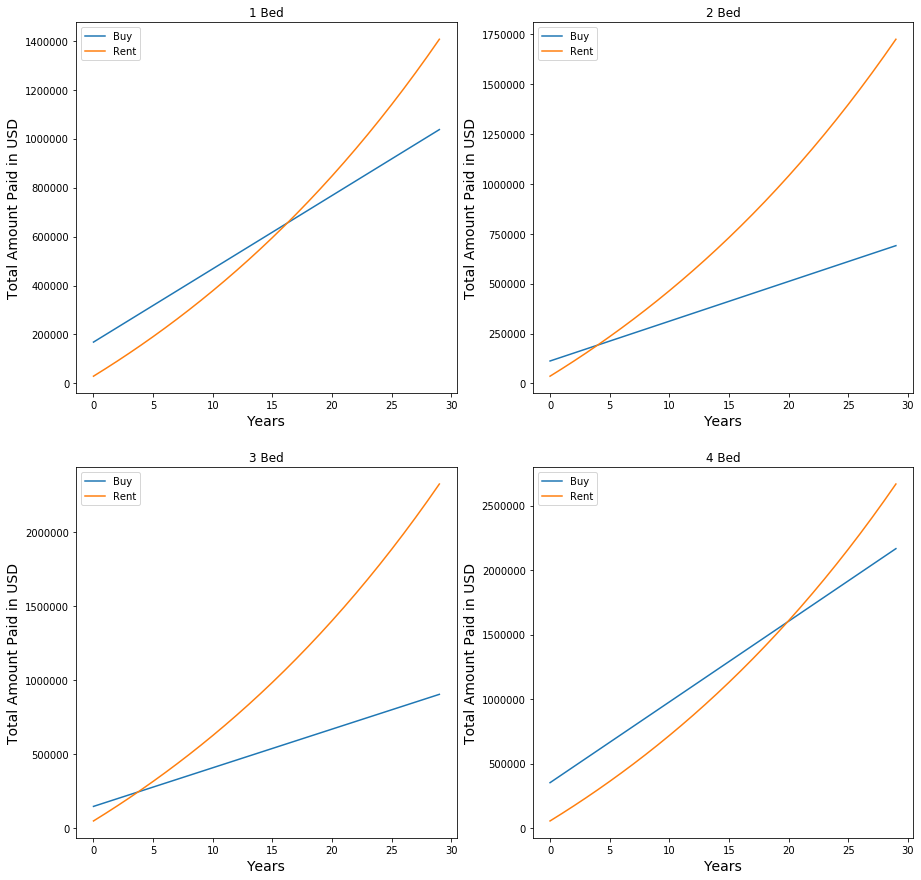

In [88]:
plotRentVsBuyForCity('SUNNYVALE')

C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


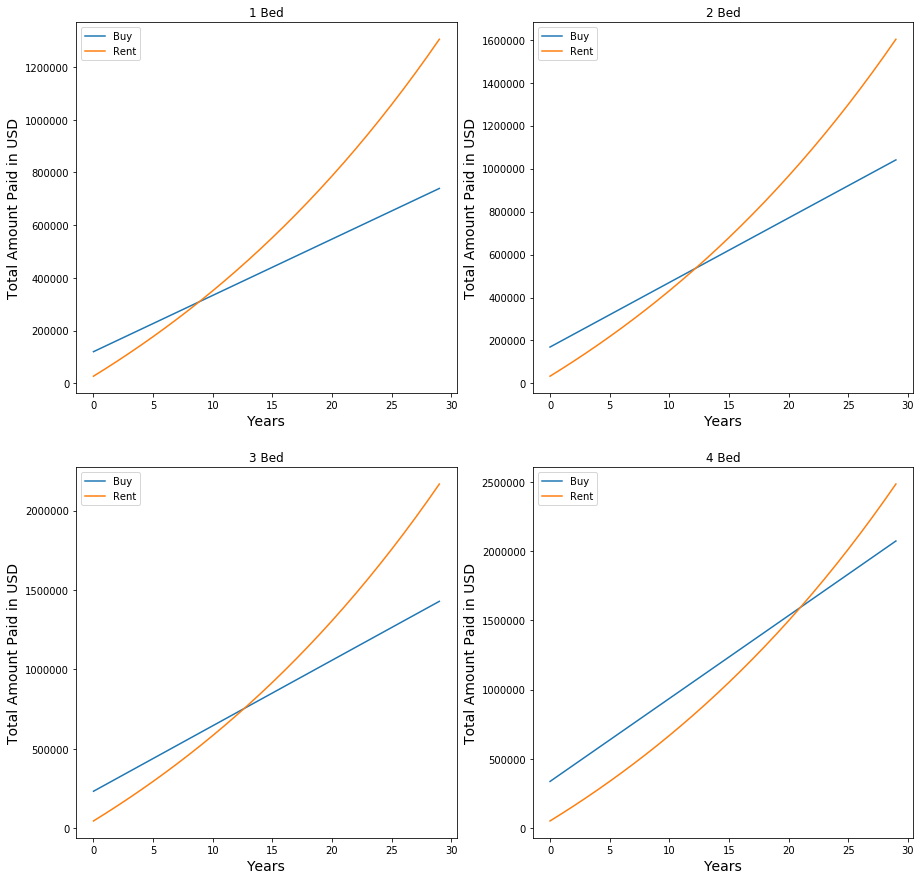

In [89]:
plotRentVsBuyForCity('SAN JOSE')

C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


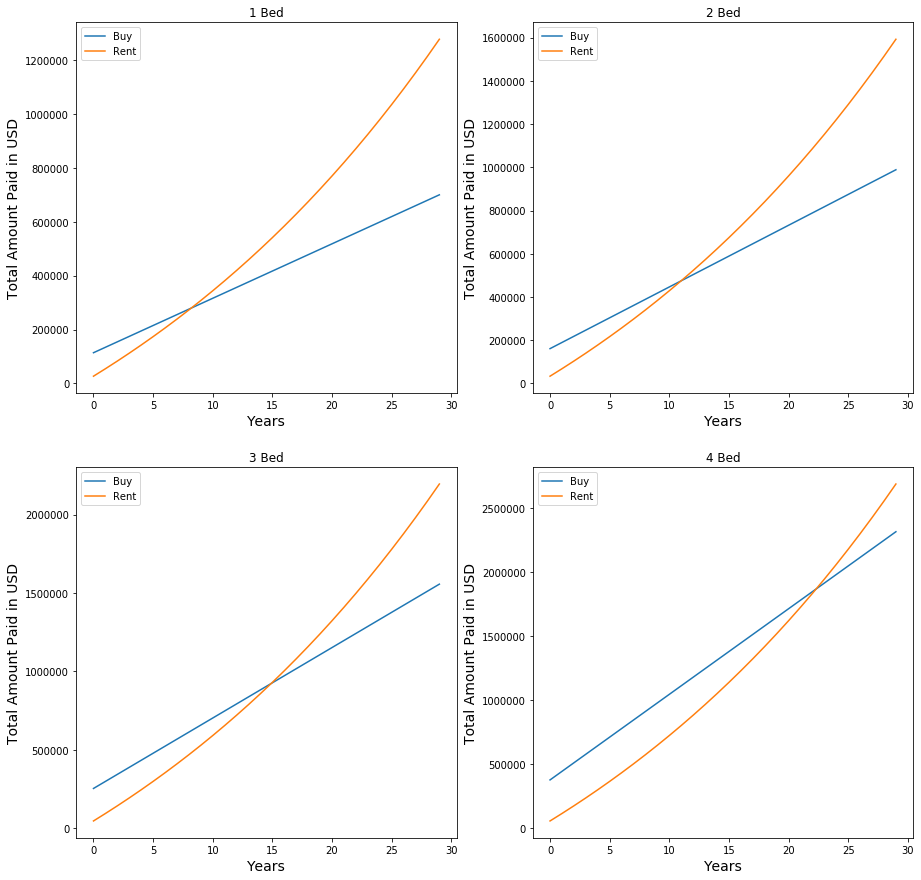

In [90]:
plotRentVsBuyForCity('FREMONT')


C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


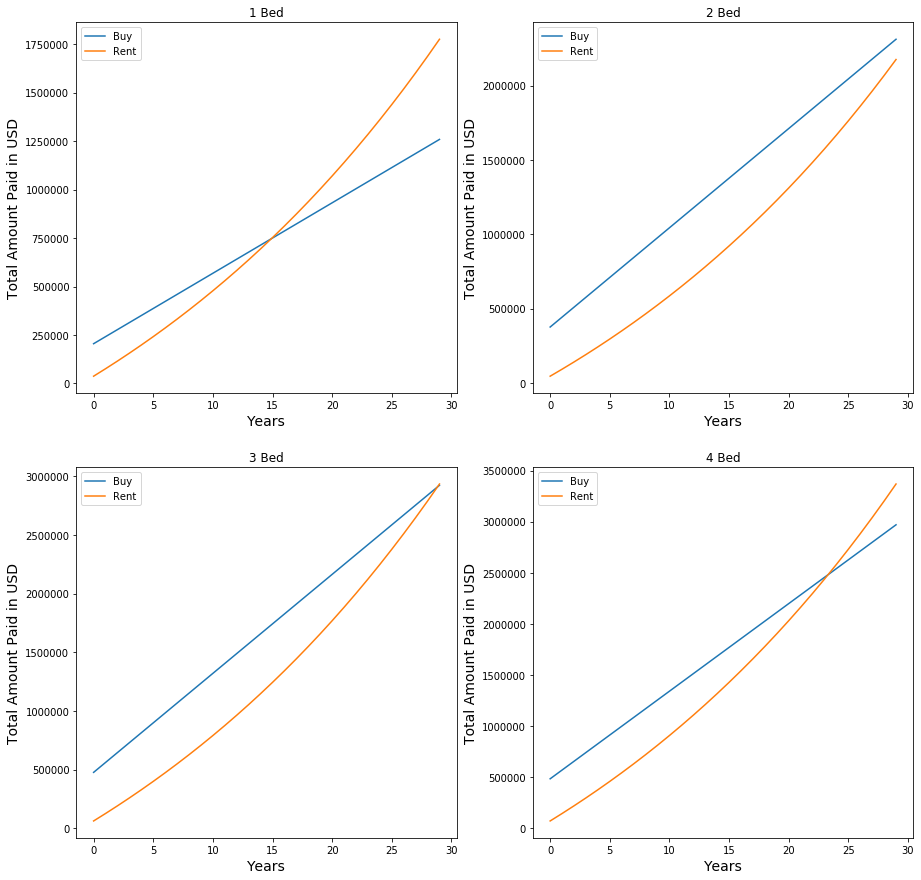

In [91]:
plotRentVsBuyForCity('CUPERTINO')